In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# For visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For loading images
from PIL import Image
import requests
from io import BytesIO


In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Adding both DFs together to do analysis
df_all = pd.concat([train_data,test_data],sort=True).reset_index(drop=True)
df_all.shape

(1309, 12)

In [6]:
# Data Dictionary
# VariableDefinitionKey survival Survival 0 = No, 1 = Yes 
# pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
# sex Sex
# Age Age in years
# sibsp # of siblings / spouses aboard the Titanic
# parch # of parents / children aboard the Titanic 
# ticket Ticket number 
# fare Passenger fare 
# cabin Cabin number
# embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# Variable Notes
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [7]:
# train_data.dtypes

In [8]:
df_all.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [9]:
# Data cleaning
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
df_all['Age'] = df_all['Age'].fillna(df_all['Age'].mean())

# Cabin will not be useful since most are null
# train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
# test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
df_all['Embarked'] = df_all['Embarked'].fillna(df_all['Embarked'].mode()[0])

In [10]:
df_all.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [11]:
df_all.where(df_all[['Fare']].isnull())

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


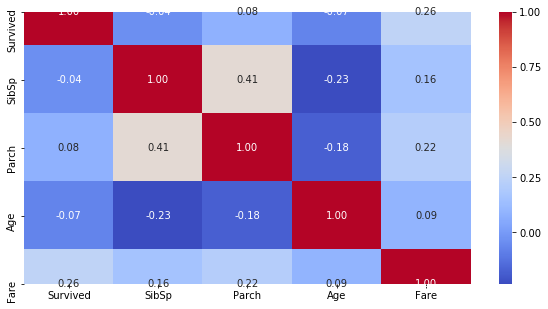

In [12]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.heatmap(train_data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True
                , fmt = ".2f", cmap = "coolwarm")

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

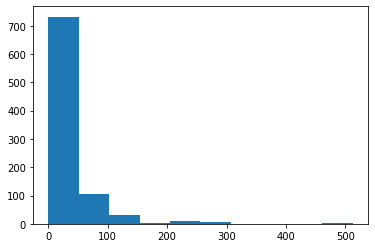

In [13]:
plt.hist(train_data.Fare)

In [20]:
# Creating Fare Buckets

def fare_bucket(x):
    if 0 < x <= 25:
        return '<25'
    elif 25 < x <= 50:
        return '<50'
    elif 50 < x <= 100:
        return '<100'
    elif 100 < x <= 150:
        return '<150'
    return '>150'

train_data['fare_bucket'] = train_data['Fare'].apply(fare_bucket)
test_data['fare_bucket'] = test_data['Fare'].apply(lambda x : fare_bucket(x))

In [15]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

encode = train_data[['Sex','Ticket','Cabin','Embarked','fare_bucket']].apply(enc.fit_transform)
train_data[['Sex','Ticket','Cabin','Embarked','fare_bucket']] = encode[['Sex','Ticket','Cabin','Embarked','fare_bucket']]
encode

TypeError: ('argument must be a string or number', 'occurred at index Cabin')

In [16]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
fare_bucket     object
dtype: object

In [17]:
encode = test_data[['Sex','Ticket','Cabin','Embarked','fare_bucket']].apply(enc.fit_transform)
test_data[['Sex','Ticket','Cabin','Embarked','fare_bucket']] = encode[['Sex','Ticket','Cabin','Embarked','fare_bucket']]

TypeError: ('argument must be a string or number', 'occurred at index Cabin')

In [18]:
# train_data.groupby([train_data['Cabin'].astype(str).str[0],'Embarked']).sum()

In [19]:
pd.get_dummies(train_data[features])

NameError: name 'features' is not defined

In [49]:
pd.get_dummies(test_data[features])

,Pclass,Sex,SibSp,Parch,fare_bucket,Age
0,3,1,0,0,2,34.50000
1,3,0,1,0,2,47.00000
2,2,1,0,0,2,62.00000
3,3,1,0,0,2,27.00000
4,3,0,1,1,2,22.00000
...,...,...,...,...,...,...
413,3,1,0,0,2,30.27259
414,1,0,0,0,1,39.00000
415,3,1,0,0,2,38.50000
416,3,1,0,0,2,30.27259


In [50]:
# Normalize Fare
from sklearn import preprocessing

x_array = np.array(train_data['Fare'])
normalized_X = preprocessing.normalize([x_array])

train_data['Fare_norm'] = (train_data['Fare'] - train_data['Fare'].mean())\
                                / (train_data['Fare'].max() - train_data['Fare'].min())

test_data['Fare_norm'] = (test_data['Fare'] - test_data['Fare'].mean())\
                                / (test_data['Fare'].max() - test_data['Fare'].min())

In [51]:
train_data['Fare'].fillna(train_data['Fare'].mean(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [53]:
# Starting with the gien random forest model
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex","Age","SibSp", "Parch", "Fare"]  #"Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=2000, max_depth=12) #, random_state=1) #
model.fit(X, y)
predictions = model.predict(X_test)
estimator = model.estimators_[5]

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission{}.csv'.format(model.score(X, y)), index=False)
print("Your submission was successfully saved!")
print(f'Model Accuracy: {model.score(X, y)}')

Your submission was successfully saved!
Model Accuracy: 0.9584736251402918


In [56]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X_test.columns,
                #class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

In [57]:
importances = model.feature_importances_
importances = pd.Series(importances)
cols = pd.Series(X.columns)

In [58]:
import_feat = pd.concat([cols,importances],axis=1)
import_feat.columns = ['Features','Importance']
import_feat = import_feat.sort_values(by=['Importance'],ascending=False)
import_feat

,Features,Importance
1,Sex,0.297796
5,Fare,0.270503
2,Age,0.244251
0,Pclass,0.097107
3,SibSp,0.051395
4,Parch,0.038949


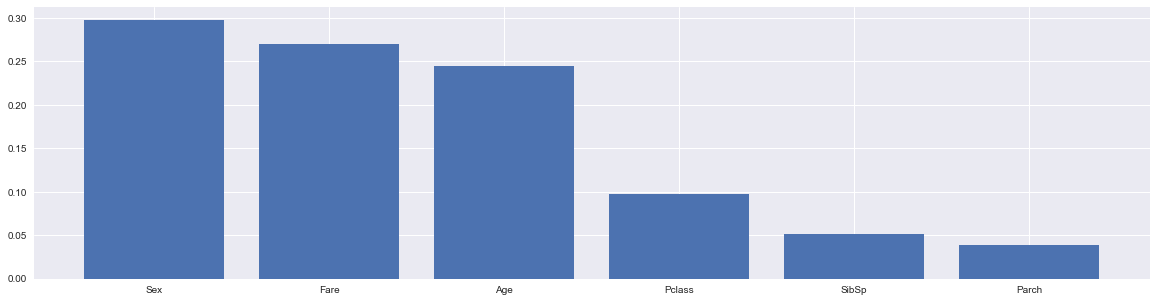

In [59]:
# Reset/Initialize Fig
plt.close('all')
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(20,5))

bar = ax.bar(import_feat['Features'],import_feat['Importance'])

In [61]:
# Label encoding location and salary
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
train_data['Cabin'] = le.fit_transform(train_data['Cabin'])
train_data['fare_bucket'] = le.fit_transform(train_data['fare_bucket'])
# train_data['Cabin_floor'] = le.fit_transform(train_data['Cabin_floor'])

test_data['Embarked'] = le.fit_transform(test_data['Embarked'])
test_data['Cabin'] = le.fit_transform(test_data['Cabin'])
test_data['fare_bucket'] = le.fit_transform(test_data['fare_bucket'])
# test_data['Cabin_floor'] = le.fit_transform(test_data['Cabin_floor'])

In [62]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_bucket,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,47,2,2,-0.048707
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0,0,0.076277
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,47,2,2,-0.047390
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2,0,0.040786
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,47,2,2,-0.047146


In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

features = ["Pclass", "Sex","Age","SibSp", "Parch", "Fare", "Embarked",'Cabin']
train_data_std = train_data[features]

train_data_std = \
                sc.fit_transform(train_data_std[features])


test_data_std = test_data[features]
test_data_std = \
                sc.fit_transform(test_data_std[features])

In [65]:
train_data_std

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.50244517,
         0.58595414, -0.28188124],
       [-1.56610693, -1.35557354,  0.63878901, ...,  0.78684529,
        -1.9423032 ,  1.16154512],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.48885426,
         0.58595414, -0.28188124],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ..., -0.17626324,
         0.58595414, -0.28188124],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.04438104,
        -1.9423032 ,  0.27001707],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.49237783,
        -0.67817453, -0.28188124]])

In [66]:
test_data_std

array([[ 0.87348191,  0.75592895,  0.3349926 , ..., -0.49840706,
        -0.47091535, -0.35149045],
       [ 0.87348191, -1.32287566,  1.32553003, ..., -0.51327429,
         0.70076689, -0.35149045],
       [-0.31581919,  0.75592895,  2.51417495, ..., -0.46508846,
        -0.47091535, -0.35149045],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, ..., -0.50879189,
         0.70076689, -0.35149045],
       [ 0.87348191,  0.75592895,  0.        , ..., -0.4944482 ,
         0.70076689, -0.35149045],
       [ 0.87348191,  0.75592895,  0.        , ..., -0.23790598,
        -1.64259759, -0.35149045]])

In [67]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50,25), max_iter=1000,activation = 'relu',solver='adam',random_state=1)

In [68]:
classifier.fit(train_data_std, train_data['Survived'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50, 25), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [69]:
y_pred = classifier.predict(train_data_std)

In [70]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, train_data['Survived'])

#Printing the accuracy
print(accuracy_score(train_data['Survived'],y_pred))

0.9023569023569024


In [71]:
predictions = classifier.predict(test_data_std)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_mlp_{}.csv'.format(accuracy_score(train_data['Survived'],y_pred)), index=False)